You work for a streaming company that is deciding to create its' own movie to put out on its' streaming platform. The company wants to know the details on how to make the first movie launch as successful as possible in the United States, but wants to also keep the broader international consumers in mind. \
Once the details of the movie have been chosen, the company also wants to know the type of user that will watch this movie. This could help bring in specific advertisers who might want to target this consumer base.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./streaming-data/streaming_viewership_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     6214 non-null   object 
 1   Session_ID                  6214 non-null   object 
 2   Device_ID                   6214 non-null   int64  
 3   Video_ID                    6214 non-null   int64  
 4   Duration_Watched (minutes)  6214 non-null   float64
 5   Genre                       6214 non-null   object 
 6   Country                     6214 non-null   object 
 7   Age                         6214 non-null   int64  
 8   Gender                      6214 non-null   object 
 9   Subscription_Status         6214 non-null   object 
 10  Ratings                     6214 non-null   int64  
 11  Languages                   6214 non-null   object 
 12  Device_Type                 6214 non-null   object 
 13  Location                    6214 

Metadata:

User_ID: Unique Identifier for the User.\
Session_ID: Unique Identifier for the Session. A session is assumed to be started when a view clicks on a video. Each seperate video watched by the same user counts as a different session.\
Device_ID: Identifier for the device used by the user.\
Video_ID: Identifier for the video content being viewed.\
Duration_Watched: The amount of time (in minutes) the user spent watching the video.\
Genre: The genre of the video content (Action, Comedy, Drama, Thriller, Sci-Fi).\
Subscription_Status: The user's subscription status (Free, Premium).\
Ratings: The user's rating or feedback for the content (1 to 5).\
Languages: The language of the content being viewed.\
Device_Type: The type of device used by the user (Smartphone, Tablet, Smart TV, Desktop, Laptop).\
Location: The location or city where the interaction event occurred.\
Playback_Quality: The quality of video playback (HD, SD, 4K).\
Interaction_Events: The count of interaction events that occurred during the user's session (e.g., clicks, likes, shares, etc.).\

Check if data needs to be cleaned

In [29]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].corr()


,Device_ID,Video_ID,Duration_Watched (minutes),Age,Ratings,Interaction_Events
Device_ID,1.000000,0.002833,0.006892,0.003308,0.012609,0.022148
Video_ID,0.002833,1.000000,0.007713,0.004196,-0.003179,0.011832
Duration_Watched (minutes),0.006892,0.007713,1.000000,0.000845,0.010902,-0.012278
Age,0.003308,0.004196,0.000845,1.000000,0.008028,0.006368
Ratings,0.012609,-0.003179,0.010902,0.008028,1.000000,-0.008162
Interaction_Events,0.022148,0.011832,-0.012278,0.006368,-0.008162,1.000000


In [2]:
df.duplicated().value_counts()

False    6214
Name: count, dtype: int64

In [3]:
df["User_ID"].value_counts()

User_ID
eb4f9229-74df-45f6-baac-cf19241b8b30    1
a42adb04-f400-4fbe-bfb5-fcf7742b7aca    1
dde847d5-3de4-44c5-84d8-9f74b7c8c33a    1
39467eae-9215-4f9f-99d4-670a0e829340    1
65ccbaf8-7bf0-4baa-9a31-b86d598ca148    1
                                       ..
0ea84d41-4260-4fb8-8094-557f354dc71d    1
3997a80f-b77d-4b31-b484-5577dd511281    1
3ec2890a-1699-450d-889f-46140a1eb4fd    1
2103a156-abbc-4870-a4ca-d2f6bb0e90ab    1
16e0315a-4993-4ce0-a098-340ea5997f3f    1
Name: count, Length: 6214, dtype: int64

In [4]:
df["Session_ID"].value_counts()

Session_ID
cb2142a7-0750-49ed-b8ac-a975fe1ff69a    1
107c28c0-f2b2-4b89-99fa-082c39903836    1
9624661b-e54f-471d-94c4-56cf12e42cbf    1
38580cc0-75d0-4e0d-b3a3-3e29c9d80676    1
7da18d8f-9d6f-4604-966c-2e8c6091fc30    1
                                       ..
47c76509-98a6-4634-ba04-8e434ea8738b    1
5faf415f-3d79-4399-85c0-2805e70da874    1
5c366ae1-c615-4565-8ad4-171b6d5dc71a    1
200efd90-5a1e-4a46-ace1-f90048546b07    1
83c2ee3b-ceef-4735-a64f-3eeac96ecbf5    1
Name: count, Length: 6214, dtype: int64

In [5]:
df.describe()

,Device_ID,Video_ID,Duration_Watched (minutes),Age,Ratings,Interaction_Events
count,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000
mean,496.762150,50.323785,60.378389,39.665594,2.987448,50.776794
std,287.681163,28.671178,34.597273,17.571317,1.403304,29.009363
min,1.000000,1.000000,0.055809,10.000000,1.000000,0.000000
25%,248.000000,26.000000,30.413538,24.000000,2.000000,26.000000
50%,493.500000,50.000000,60.765637,40.000000,3.000000,51.000000
75%,742.000000,75.000000,90.874141,55.000000,4.000000,76.000000
max,1000.000000,100.000000,119.999972,70.000000,5.000000,100.000000


Observing the shape of the data, there are some possible outliers at bottom percentile of duration watched that may have been misclicks. Otherwise, unique values are unique, other measured values are within a reasonable range, and there are no null values. One thing to note of interest is that a user is only ever represented in the dataset once, and tied to one instance of a session.

Different metrics for success:

Highly rated, total watch time, interactions
As a note, watch time can directly lead to higher revenue for free users, as they will be shown ads. Should investigate if there is a difference between what free users watch vs premium users.

Genre
Action         61969.060436
Comedy         60495.726317
Documentary    66083.098348
Drama          60410.830093
Sci-Fi         62453.576739
Thriller       63779.014247
Name: Duration_Watched (minutes), dtype: float64
['Sci-Fi' 'Comedy' 'Documentary' 'Action' 'Drama' 'Thriller']


<BarContainer object of 6 artists>

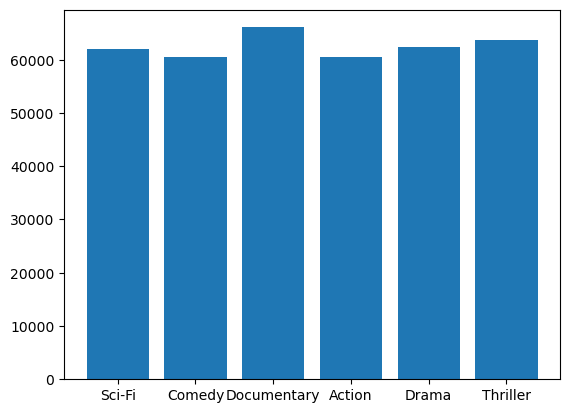

In [15]:
#Total Time Watched

duration_by_genre = df.groupby('Genre')['Duration_Watched (minutes)'].sum()
plt.bar(df["Genre"].unique(),  duration_by_genre)

TypeError: Axes.text() missing 1 required positional argument: 's'

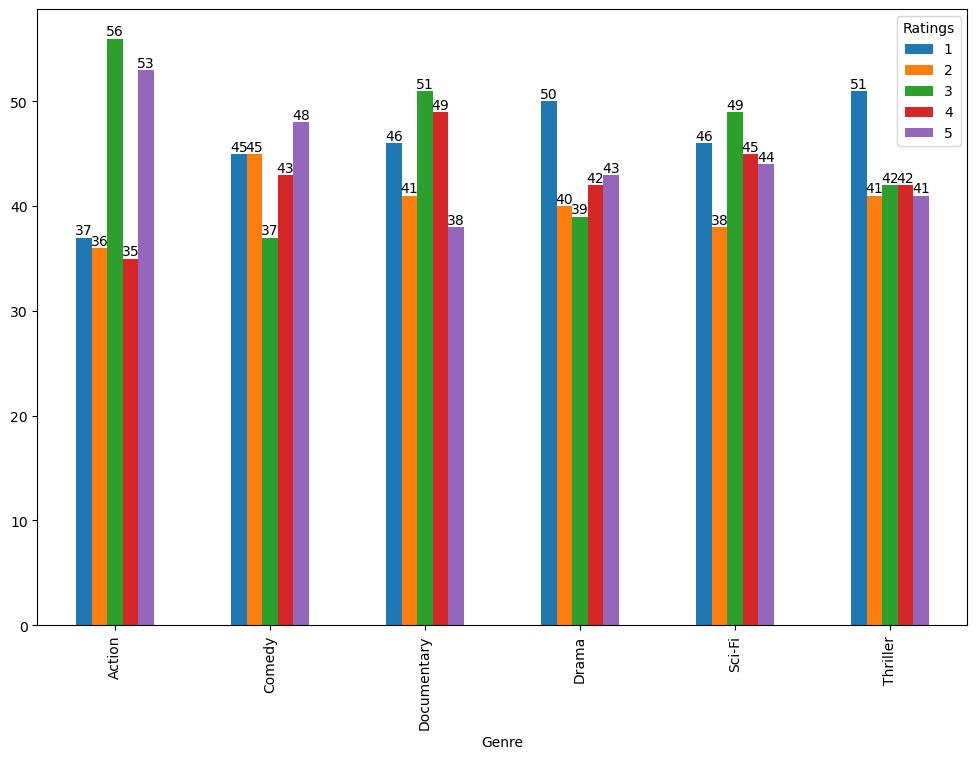

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame to include only rows where the language is English
df_english = df[df['Languages'] == 'English']

# Group by 'Genre' and 'Ratings' and count the occurrences
grouped_df = df_english.groupby(['Genre', 'Ratings']).size().reset_index(name='Count')

# Pivot the DataFrame to have genres on the x-axis and ratings as columns
pivot_df = grouped_df.pivot(index='Genre', columns='Ratings', values='Count').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', figsize=(12, 8))

# Annotate the bars with the count values
for container in ax.containers:
    ax.bar_label(container)

# Calculate the average rating for each genre
average_ratings = df_english.groupby('Genre')['Ratings'].mean()

for idx, row in average_ratings.reset_index().iterrows():
    genre = row['Genre']
    avg_rating = row['Ratings']
    ax.text(idx, 50, f'Avg: {avg_rating:.2f}', ha='center', va='top', color='black', fontweight='bold')


plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Ratings by Genre (English Only)')
plt.legend(title='Ratings')
plt.show()

In [31]:
print(average_ratings)

         Genre   Ratings
0       Action  3.142857
1       Comedy  3.018349
2  Documentary  2.964444
3        Drama  2.943925
4       Sci-Fi  3.013514
5     Thriller  2.912442
